In [1]:
import pandas as pd
import numpy as np

import scipy

from datetime import datetime, time, date

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

In [2]:
df_hierro = pd.read_csv('data/df_hierro_clean.csv', parse_dates=['datetime'])
df_hierro.head()

datetime  demand  diesel  wind  pump_hydro  dsch_hydro
0 2016-01-01 00:00:00     5.1     5.2   0.0         0.0         0.0
1 2016-01-01 00:10:00     5.1     5.2   0.0         0.0         0.0
2 2016-01-01 00:20:00     5.3     5.4   0.0         0.0         0.0
3 2016-01-01 00:30:00     5.3     5.4   0.0         0.0         0.0
4 2016-01-01 00:40:00     5.3     5.4   0.0         0.0         0.0

In [3]:
df_hierro = df_hierro[~df_hierro.datetime.duplicated()]#.set_index('datetime')

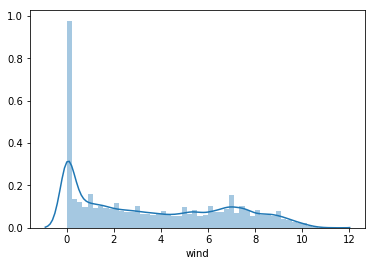

In [4]:
plt.figure()
sns.distplot(df_hierro.wind)#.plot()

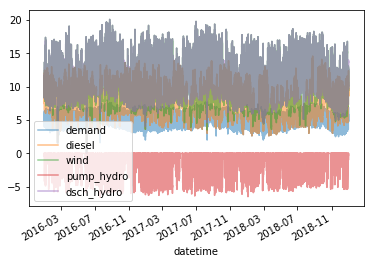

In [5]:
df_hierro.set_index('datetime').plot(stacked=True, alpha=0.5)

<Figure size 432x288 with 0 Axes>

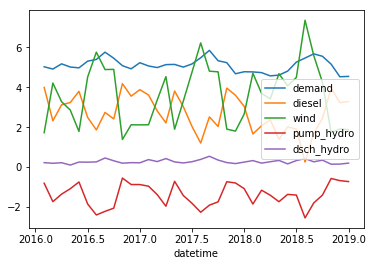

In [6]:
s_datetime_idx = df_hierro.set_index('datetime').index
s_month = s_datetime_idx.month
s_year = s_datetime_idx.year
s_month_year = s_year + s_month/12

plt.figure()
df_hierro.groupby(s_month_year).mean().plot()

<br>

### Monthly Demand & Supply

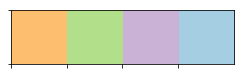

In [7]:
stacked_cmap = [
    (0.9921568627450981, 0.7490196078431373, 0.43529411764705883), # Orange
    (0.6980392156862745, 0.8745098039215686, 0.5411764705882353), # Green
    (0.792156862745098, 0.6980392156862745, 0.8392156862745098), # Purple
    (0.6509803921568628, 0.807843137254902, 0.8901960784313725), # Blue
]

# orange, green, purple blue

sns.set_palette(stacked_cmap)
sns.palplot(stacked_cmap)

In [8]:
month_abrvs = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
month_num_2_abrv_map = dict(zip( list(range(1, 13)), month_abrvs ))

s_month.map(month_num_2_abrv_map)

Index(['Jan', 'Jan', 'Jan', 'Jan', 'Jan', 'Jan', 'Jan', 'Jan', 'Jan', 'Jan',
       ...
       'Dec', 'Dec', 'Dec', 'Dec', 'Dec', 'Dec', 'Dec', 'Dec', 'Dec', 'Dec'],
      dtype='object', name='datetime', length=157715)

In [9]:
df_hierro_18 = df_hierro[(df_hierro['datetime']>'2018-01-01 00:00:00')&(df_hierro['datetime']<'2019-01-01 00:00:00')].copy()
df_monthly_hierro_GWh = df_hierro_18.groupby(df_hierro_18.datetime.dt.month).sum()/6000
df_monthly_hierro_GWh.index = df_monthly_hierro_GWh.index.map(month_num_2_abrv_map)
df_monthly_hierro_GWh = df_monthly_hierro_GWh.rename(columns={
    'demand' : 'Demand',
    'diesel' : 'Diesel',
    'wind' : 'Wind',
    'pump_hydro' : 'Pumped Hydro',
    'dsch_hydro' : 'Discharged Hydro',
})

df_monthly_hierro_GWh

Demand    Diesel      Wind  Pumped Hydro  Discharged Hydro
datetime                                                              
Jan       3.548817  1.235433  3.500550     -1.378550          0.242400
Feb       3.182017  1.391650  2.481483     -0.778433          0.133450
Mar       3.397650  1.762033  2.542867     -1.047450          0.199467
Apr       3.319117  1.002667  3.370083     -1.249183          0.241233
May       3.579333  1.501067  3.026400     -1.017967          0.119300
Jun       3.787583  1.371833  3.235367     -1.008683          0.235233
Jul       4.059883  0.190083  5.466967     -1.891967          0.317950
Aug       4.223183  1.254500  4.160533     -1.337433          0.197650
Sep       3.999417  1.760250  3.063633     -1.010733          0.250250
Oct       3.818667  2.934033  1.275767     -0.422517          0.107800
Nov       3.248200  2.316667  1.371683     -0.486517          0.108617
Dec       3.364233  2.435617  1.384467     -0.537417          0.146700

In [10]:
fig = plt.figure(dpi=1500)
ax1 = plt.subplot(211)
ax2 = plt.subplot(212, sharex = ax1)

df_monthly_hierro_GWh.drop(columns='Demand').plot.bar(width=0.9, edgecolor='k', ax=ax1)
df_monthly_hierro_GWh.Demand.plot.bar(color='gray', edgecolor='k', ax=ax2)

#plt.title('')
ax1.legend(frameon=False, ncol=2, loc='upper center', bbox_to_anchor=(0.5, 1.4))

ax1.set_ylabel('Total Generation\n(GWh)', labelpad=4)
ax2.set_ylabel('Total Demand\n(GWh)', labelpad=12)
ax2.set_xlabel('')

ax1.set_yticks([-1, 1, 3, 5])
ax1.tick_params(axis='x', which='both',length=0)

ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)

plt.savefig('img/demand_and_supply.png') 

<br>

###

In [11]:
plt.rcParams.update({'figure.max_open_warning': 0})

plot_months = False

if plot_months == True:
    for year in [2016, 2017, 2018]:
        for month in list(range(1, 13)):
            plt.figure()
            df_hierro[(s_month==month)&(s_year==year)].set_index('datetime').plot()
            plt.savefig(f'img/monthly/{year}_{month}.png')

In [12]:
year_month_combos = [
    [5, 2016],
    [2, 2017],
    [4, 2017],
    [5, 2017],
    [3, 2018],
    [9, 2018],
    [10, 2018],
]

plot_all = False
if plot_all == True:
    for month, year in year_month_combos:
        plt.figure()
        df_hierro[(s_month==month)&(s_year==year)].set_index('datetime').plot()

<Figure size 3600x2400 with 0 Axes>

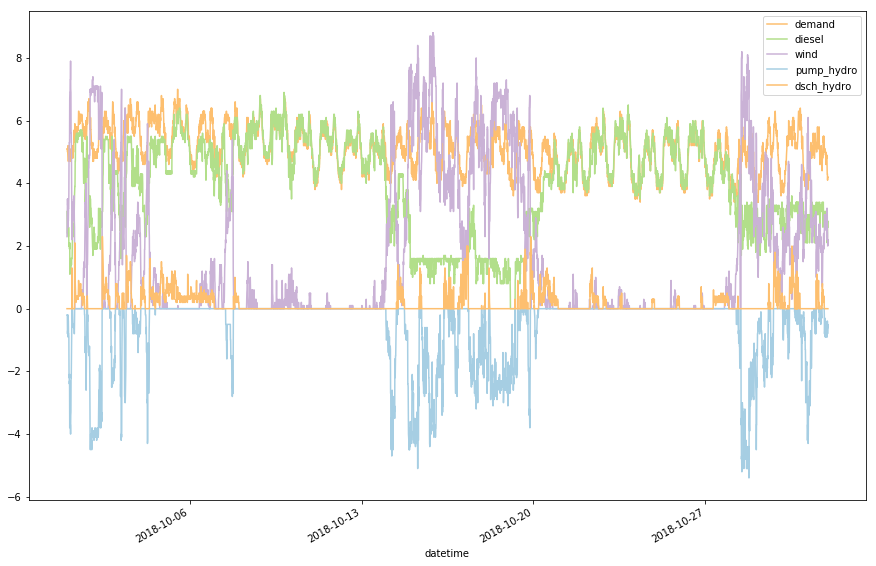

<Figure size 3600x2400 with 0 Axes>

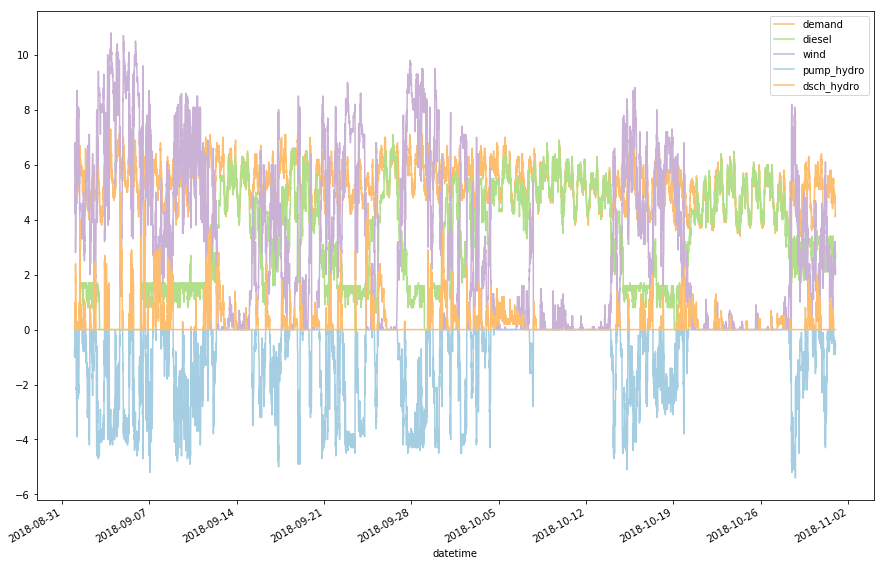

In [14]:
month, year = year_month_combos[6]

plt.figure(dpi=600)
df_plot = df_hierro[(s_month==month)&(s_year==year)].set_index('datetime')
df_plot.plot(figsize=(15, 10))
plt.legend()

plt.figure(dpi=600)
df_plot = df_hierro[s_month.isin([month-1, month])&(s_year==year)].set_index('datetime')
df_plot.plot(figsize=(15, 10))
plt.legend()

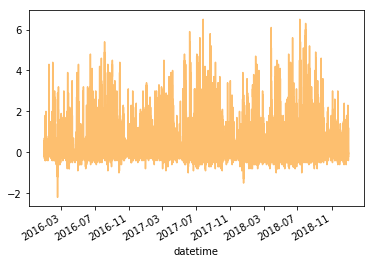

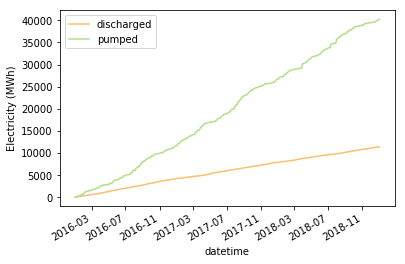

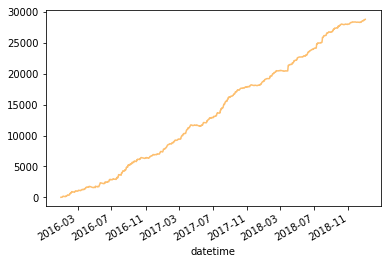

In [29]:
df_hierro = df_hierro.assign(wind_adj = df_hierro.wind + df_hierro.pump_hydro)
s_demand_delta = df_hierro.set_index('datetime').demand - (df_hierro.set_index('datetime').wind_adj + df_hierro.set_index('datetime').diesel)
s_wind_demand_delta = df_hierro.set_index('datetime').demand - df_hierro.set_index('datetime').wind_adj
                                                           
plt.figure()
s_demand_delta.plot()

plt.figure()
np.abs(s_demand_delta[s_demand_delta<0].cumsum()).plot(label='discharged')
s_demand_delta[s_demand_delta>0].cumsum().plot(label='pumped')
plt.legend()
plt.ylabel('Electricity (MWh)')

plt.figure()
s_demand_delta.cumsum().plot()

In [16]:
s_pumped = np.abs(s_demand_delta[s_demand_delta<0].cumsum()/6)
s_discharged = (s_demand_delta[s_demand_delta>0].cumsum()/6)

s_pumped.shape#

(83988,)

In [49]:
df_hydro = pd.DataFrame({
    'pump_hydro' : np.abs(s_demand_delta[s_demand_delta<0]),
    'rolling_pumped' : np.abs(s_demand_delta[s_demand_delta<0]).rolling(28).mean(),
    'dsch_hydro' : s_demand_delta[s_demand_delta>0], 
    'wind_demand_delta' : s_wind_demand_delta
}).fillna(0)

df_hydro.head()

pump_hydro  rolling_pumped  dsch_hydro  wind_demand_delta
datetime                                                                      
2016-01-01 00:00:00         0.1             0.0         0.0                5.1
2016-01-01 00:10:00         0.1             0.0         0.0                5.1
2016-01-01 00:20:00         0.1             0.0         0.0                5.3
2016-01-01 00:30:00         0.1             0.0         0.0                5.3
2016-01-01 00:40:00         0.1             0.0         0.0                5.3

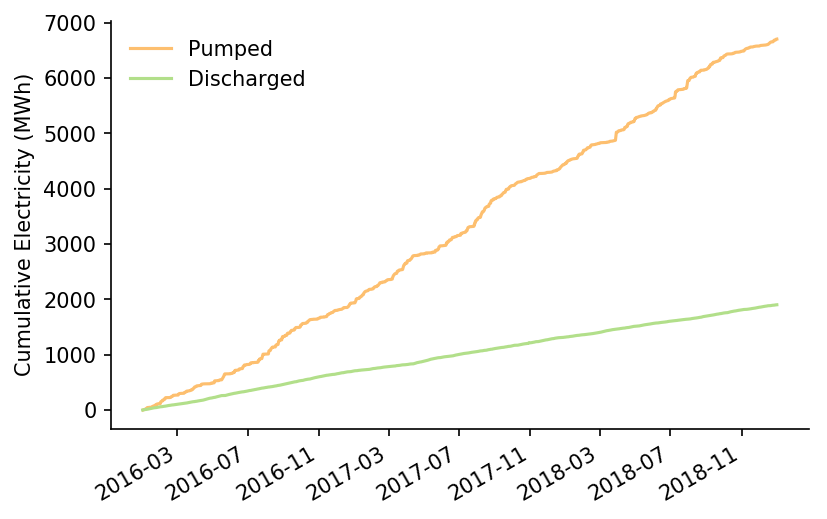

In [17]:
s_pumped = np.abs(s_demand_delta[s_demand_delta<0].cumsum()/6)
s_discharged = (s_demand_delta[s_demand_delta>0].cumsum()/6)

## Plotting
fig = plt.figure(dpi=150)
ax = plt.subplot()

s_discharged.plot(label='Pumped', ax=ax)
s_pumped.plot(label='Discharged', ax=ax)

#plt.title('Operation at Pumped-Hydro Plant', y=0.93)
plt.legend(frameon=False)#, bbox_to_anchor=(0.32, 0.7))

plt.ylabel('Cumulative Electricity (MWh)')
plt.xlabel('')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.savefig('img/hydro_plant_operation.png')

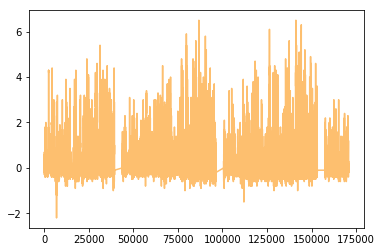

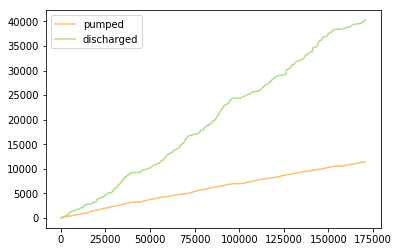

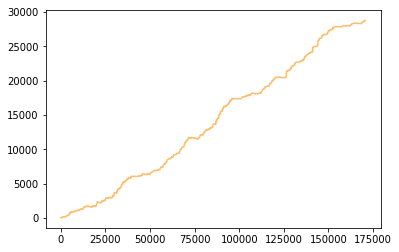

In [18]:
df_hierro = df_hierro.assign(wind_adj = df_hierro.wind + df_hierro.pump_hydro)
s_demand_delta = df_hierro.demand - (df_hierro.wind_adj + df_hierro.diesel)

plt.figure()
s_demand_delta.plot()

plt.figure()
np.abs(s_demand_delta[s_demand_delta<0].cumsum()).plot(label='pumped')
s_demand_delta[s_demand_delta>0].cumsum().plot(label='discharged')
plt.legend()
plt.ylabel

plt.figure()
s_demand_delta.cumsum().plot()

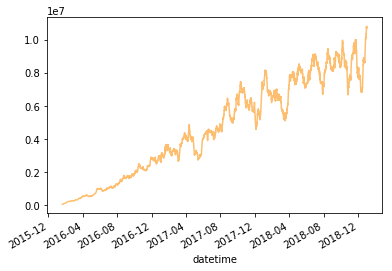

In [32]:
rolling_windows = [1, 4, 8, 28]

for rolling_window in rolling_windows:
    df_hydro_rolling = df_hydro.rolling(window=4*24*rolling_window).sum()
    df_hydro[f'rolling_net_pump_{rolling_window}'] = df_hydro_rolling.pump_hydro + df_hydro_rolling.dsch_hydro

df_hydro = df_hydro.dropna()
df_hydro.rolling_net_pump_28.plot()

In [ ]:
plt.figure(dpi=100)

plt.scatter(df_hydro.wind_demand_delta, df_hydro.dsch_hydro, alpha=0.01, c=df_hydro.rolling_pumped, cmap='viridis')
            
plt.xlim(0, 7)
#plt.ylim(0, 3)
plt.xlabel('Wind Demand Delta (MW)')
plt.ylabel('Discharged Hydro (MW)')

Text(0,0.5,'Discharged Hydro (MW)')

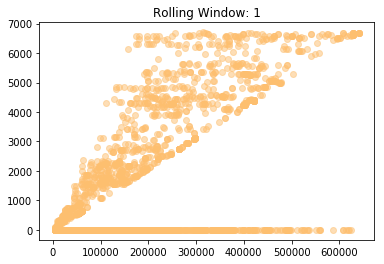

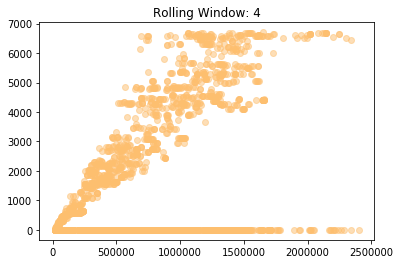

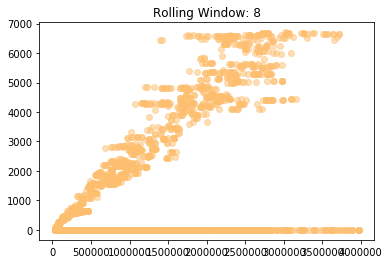

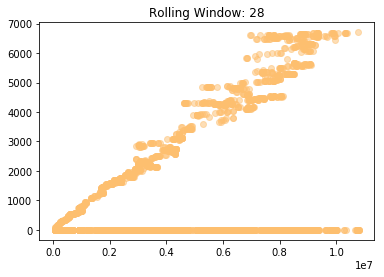

In [37]:
## Creating slice
slice_margin = 0.05
slice_center = 4
df_hydro_wind_slice = (
    df_hydro[
        (df_hydro.wind_demand_delta > slice_center-slice_margin) 
        & 
        (df_hydro.wind_demand_delta < slice_center+slice_margin)
    ]
    .copy()
)


## Plotting
for rolling_window in rolling_windows:
    plt.figure()
    plt.scatter(df_hydro_wind_slice[f'rolling_net_pump_{rolling_window}'], df_hydro_wind_slice.dsch_hydro,
                alpha=0.5)#, c=df_hydro_wind_slice.wind_demand_delta, cmap='viridis')
    plt.title(f'Rolling Window: {rolling_window}')

In [38]:
## Setting feature and target variables
target = 'dsch_hydro'
features = ['wind_demand_delta'] + [f'rolling_net_pump_{x}' for x in rolling_windows]

## Statsmodel Regression
y = df_hydro[target]
X = df_hydro[features]

model = sm.OLS(y, sm.add_constant(X)) 
results = model.fit()

results.summary()

NameError: name 'sm' is not defined

In [ ]:
## Restrict prediction area to just the rectangle in the above diagram

df_hydro['dsch_hydro_pred'] = results.predict()

plt.figure(dpi=800)

plt.scatter(df_hydro.dsch_hydro, df_hydro.dsch_hydro_pred, color='mediumturquoise', edgecolors='k', linewidths=0.5, alpha=0.025, s=100)
plt.plot([0, 6], [0, 6], 'k--')

plt.xlim(0, 4)
plt.ylim(0, 4)
plt.xlabel('Actual Hydro Discharge')
plt.ylabel('Predicted Hydro Discharge')

<br>

## Random Forest

Linear regression appears to yield poor results, will test out random forests instead

Also need to test out different windows for the rolling net pump sums

In [17]:
def format_data_4_ML(df_ToU, target, features, print_arr_sizes=True):
    ## Converting features and target to arrays
    target_arr = np.array(df_ToU[target]).astype('float32')
    features_arr = np.array(df_ToU[features]).astype('float32')

    # Split the data into training and testing sets
    train_features, test_features, train_labels, test_labels = train_test_split(features_arr, target_arr, test_size = 0.05, random_state = 42)

    ## Scaling the features
    scaler = preprocessing.StandardScaler().fit(test_features)
    test_features = scaler.transform(test_features)
    train_features = scaler.transform(train_features)

    ## Printing array sizes
    if print_arr_sizes == True:
        print('')
        print('Training Features Shape:', train_features.shape)
        print('Training Labels Shape:', train_labels.shape)
        print('Testing Features Shape:', test_features.shape)
        print('Testing Labels Shape:', test_labels.shape)
    
    return train_features, test_features, train_labels, test_labels

train_features, test_features, train_labels, test_labels = format_data_4_ML(df_hydro, target, features)


Training Features Shape: (159606, 5)
Training Labels Shape: (159606,)
Testing Features Shape: (8401, 5)
Testing Labels Shape: (8401,)


In [18]:
def determine_baseline_err(test_labels, print_err=True):
    # The baseline predictions are the historical averages
    baseline_preds = np.ones(test_labels.size)*np.average(test_labels)

    # Baseline errors, and display average baseline error
    baseline_errors = abs(baseline_preds - test_labels)
    baseline_error = np.mean(baseline_errors)
    
    if print_err == True:
        print('')
        print('Average baseline error: ', round(baseline_error, 4))
    
    return baseline_error

baseline_error = determine_baseline_err(test_labels)


Average baseline error:  0.4153


In [19]:
## RF Model Helper Functions

def run_metrics(test_labels, pred_test_labels, print_results=True, return_results=True):
    # Metrics
    MAE = metrics.mean_absolute_error(test_labels, pred_test_labels)
    MSE = metrics.mean_squared_error(test_labels, pred_test_labels)
    RMSE = np.sqrt(metrics.mean_squared_error(test_labels, pred_test_labels))
    
    MAPE = np.mean(np.abs((test_labels - pred_test_labels) / (test_labels+0.0001))) * 100
    r2 = metrics.r2_score(test_labels, pred_test_labels)

    # Metric Printout
    if print_results == True:
        print('')
        print(f'Mean Absolute Error: {round(MAE, 4)}')  
        print(f'Mean Squared Error: {round(MSE, 4)}')  
        print(f'Root Mean Squared Error: {round(RMSE, 4)}') 
        print(f'Mean Absolute Percentage Error: {int(MAPE)}')
        print(f'R2 Score: {round(r2, 4)}')
    
    if return_results == True:
        return {'MAE':MAE, 'MSE':MSE, 'RMSE':RMSE, 'MAPE':MAPE, 'r2':r2}
    
def create_df_importances(rf, features):
    # Get numerical feature importances
    importances = list(rf.feature_importances_)

    ## Creating dataframe of importances
    df_importances = (pd.DataFrame(data={'importances':importances, 'features':features})
                      .sort_values('importances', ascending=False)
                     )

    return df_importances

def plot_RF_var_importances(df_importances):
    # list of x locations for plotting
    x_values = list(range(len(df_importances.importances)))

    # Make a bar chart
    plt.figure(figsize=(20, 6))
    plt.bar(x_values, df_importances.importances, orientation = 'vertical')
    plt.grid(False)

    # Tick labels for x axis
    plt.xticks(x_values, df_importances.features, rotation='vertical')

    # Axis labels and title
    plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances')


Training Features Shape: (159606, 5)
Training Labels Shape: (159606,)
Testing Features Shape: (8401, 5)
Testing Labels Shape: (8401,)

Mean Absolute Error: 0.0692
Mean Squared Error: 0.0318
Root Mean Squared Error: 0.1783
Mean Absolute Percentage Error: 20507
R2 Score: 0.9297

Error reduction on baseline: 83.33%


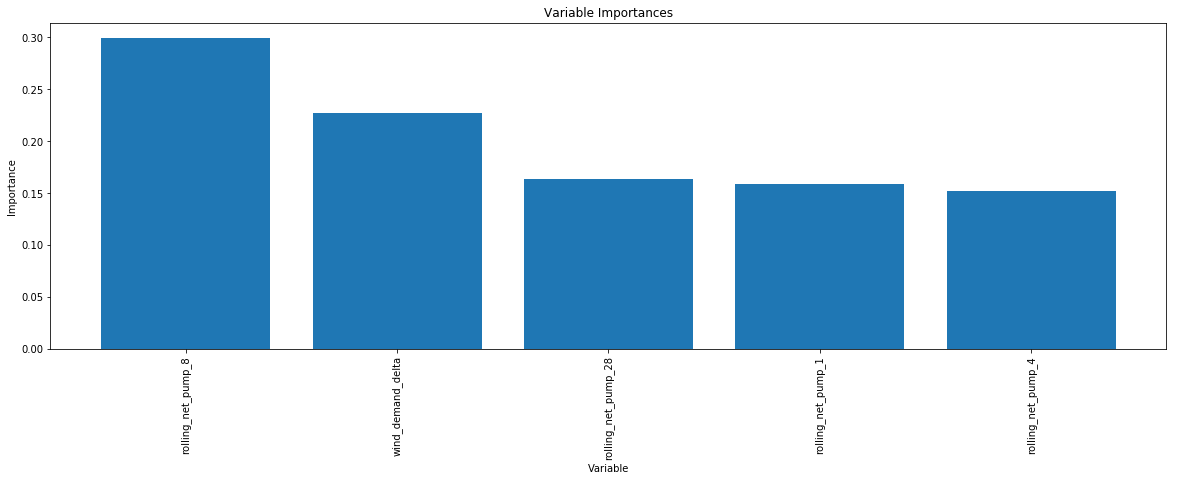

In [20]:
## Automated RM Model
def combined_RF_model(train_features, train_labels, test_features, test_labels, features, 
                      determine_importances=True, n_trees=1000, return_rf=True,
                      return_importances=True, run_model_metrics=True):
    
    if determine_importances == False and return_importances == True:
        raise ValueError("If importances are to be returned 'determine_importances' must be set to True")
    
    # Instantiate model with n decision trees
    rf = RandomForestRegressor(n_estimators = n_trees, random_state = 42)

    # Train the model on training data
    rf.fit(train_features, train_labels);

    # Using the forest's predict method on the test data
    pred_test_labels = rf.predict(test_features)
    
    # Running the metrics
    if run_model_metrics == True:
        metrics_dict = run_metrics(test_labels, pred_test_labels)
        MAE = metrics_dict['MAE']

        # Improvement on baseline
        baseline_error = determine_baseline_err(test_labels, print_err=False)
        pct_reduction_on_baseline = round(100*(MAE-baseline_error)/baseline_error, 2)
        print('')
        print(f'Error reduction on baseline: {-pct_reduction_on_baseline}%')
    
    ## Plotting the importances of each variable in the model
    if determine_importances == True:
        df_importances = create_df_importances(rf, features)
        plot_RF_var_importances(df_importances)
        
    ## Returning RF objects
    if return_rf == True and return_importances == True:
        return rf, df_importances
    elif return_rf == True and return_importances == False:
        return rf
    elif return_rf == False and return_importances == True:
        return df_importances
    else:
        return 
      
train_features, test_features, train_labels, test_labels = format_data_4_ML(df_hydro, target, features)
rf, df_importances = combined_RF_model(train_features, train_labels, test_features, test_labels, features, n_trees=100, )

Text(0,0.5,'Predicted Hydro Discharge')

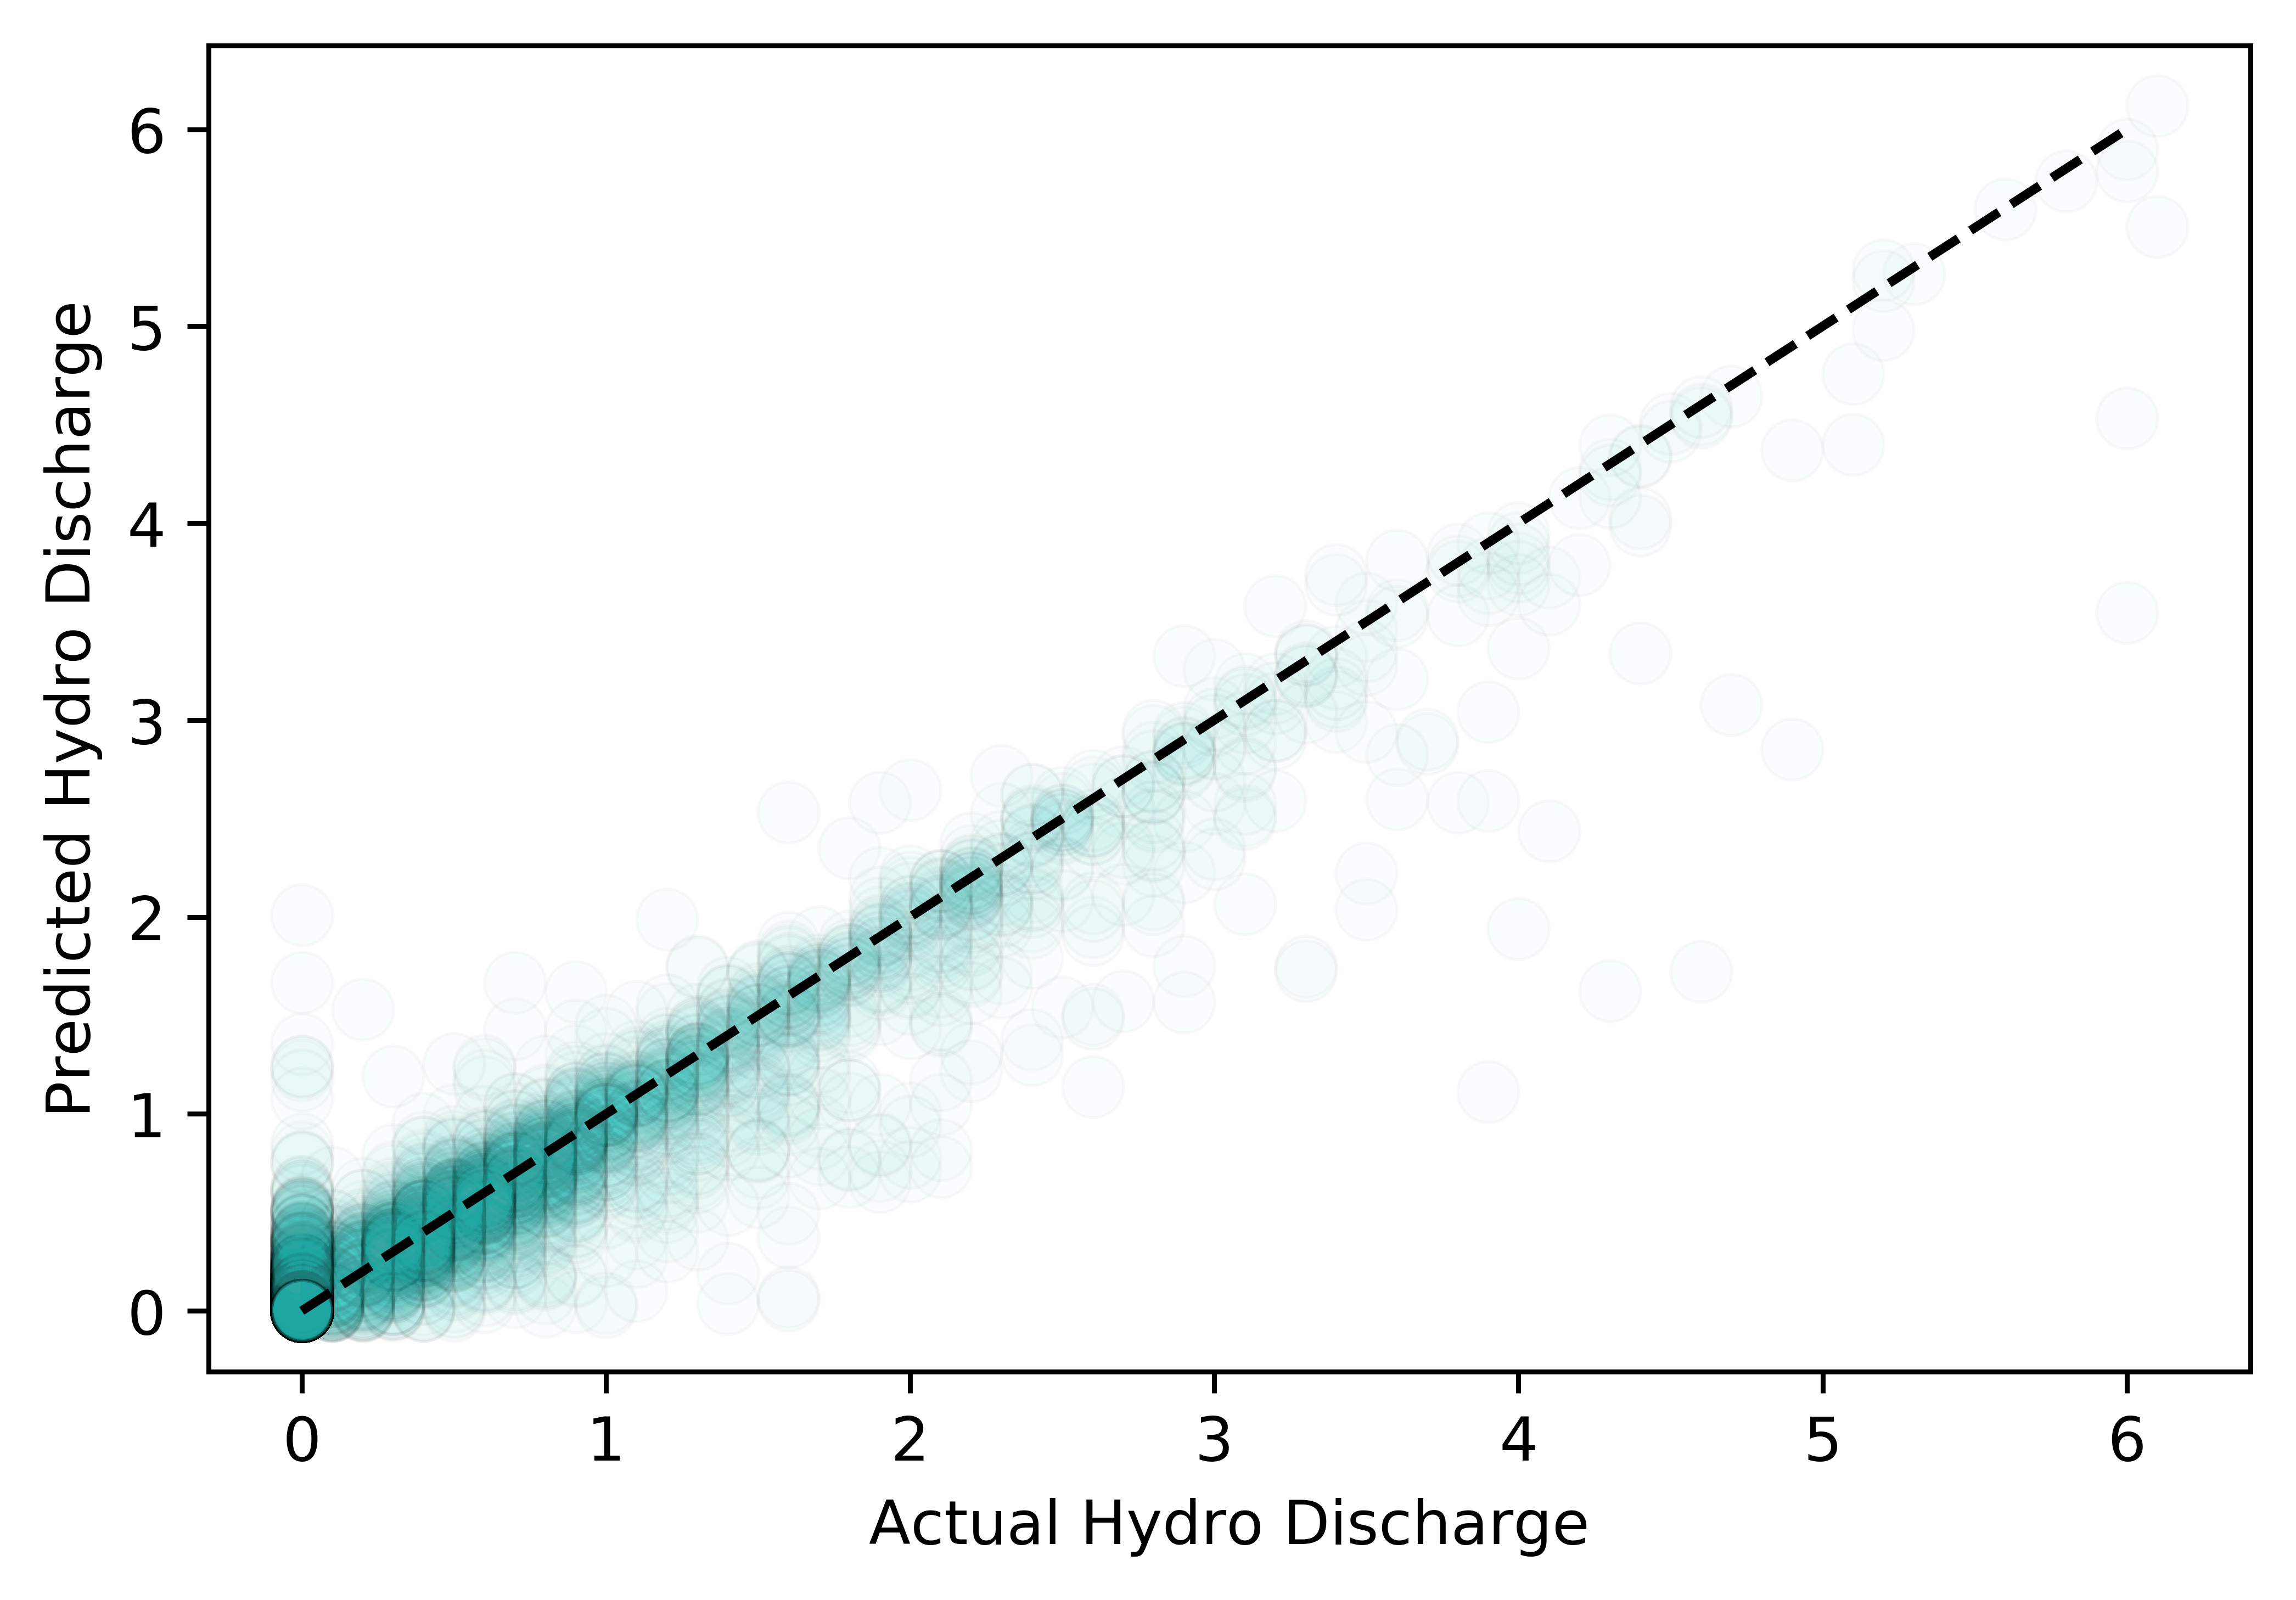

In [21]:
pred_labels = rf.predict(test_features)

plt.figure(dpi=800)

plt.scatter(test_labels, pred_labels, color='mediumturquoise', edgecolors='k', linewidths=0.5, alpha=0.025, s=100)
plt.plot([0, 6], [0, 6], 'k--')

#plt.xlim(0, 4)
#plt.ylim(0, 4)
plt.xlabel('Actual Hydro Discharge')
plt.ylabel('Predicted Hydro Discharge')

In [22]:
mean_net_pumping = []

for rolling_window in rolling_windows:
    mean_net_pumping.append(df_hydro[f'rolling_net_pump_{rolling_window}'].mean())
    
mean_net_pumping = dict(zip(rolling_windows, mean_net_pumping))
mean_net_pumping

{1: -110.12694411542458,
 4: -441.34047986094566,
 8: -883.2733344444212,
 28: -3087.405955108955}

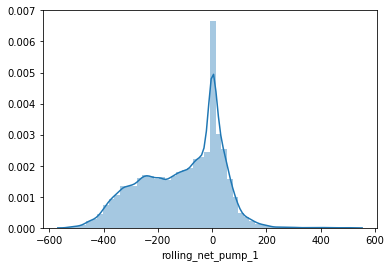

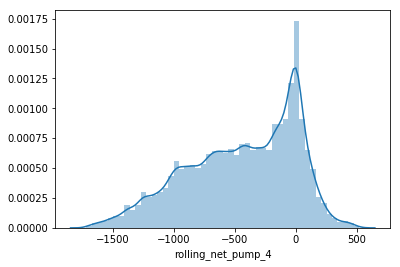

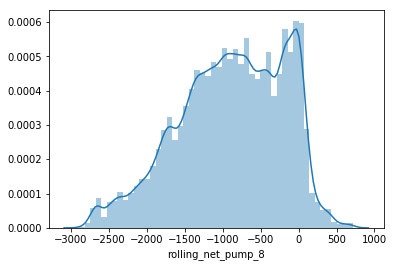

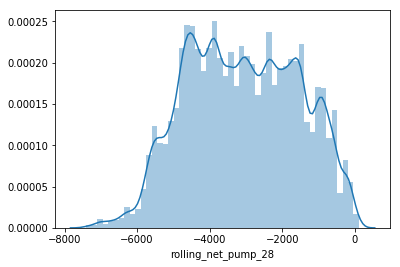

In [23]:
for rolling_window in rolling_windows:
    plt.figure()
    sns.distplot(df_hydro[f'rolling_net_pump_{rolling_window}'])

In [24]:
## Determining parameters of features

rf_inv_dict = dict()

for feature in features:
    rf_inv_dict[feature] = dict()
    
    rf_inv_dict[feature]['_mean'] = df_hydro[feature].mean()
    rf_inv_dict[feature]['_min'] = df_hydro[feature].min()
    rf_inv_dict[feature]['_max'] = df_hydro[feature].max()
    
rf_inv_dict

{'wind_demand_delta': {'_mean': 2.8498723267484167, '_min': -1.5, '_max': 7.6},
 'rolling_net_pump_1': {'_mean': -110.12694411542458,
  '_min': -526.8999999999934,
  '_max': 511.40000000000634},
 'rolling_net_pump_4': {'_mean': -441.34047986094566,
  '_min': -1718.1000000000022,
  '_max': 520.1000000000024},
 'rolling_net_pump_8': {'_mean': -883.2733344444212,
  '_min': -2888.200000000071,
  '_max': 721.799999999975},
 'rolling_net_pump_28': {'_mean': -3087.405955108955,
  '_min': -7400.999999999802,
  '_max': 117.0000000001641}}

In [25]:
def generate_fake_step_series(rf_inv_dict, step_feature, _num=5, series_len=1000):
    _min = rf_inv_dict[step_feature]['_min']
    _max = rf_inv_dict[step_feature]['_max']

    fake_step_series_dict = dict()
    series_vals = [round(x, 2) for x in np.linspace(_min, _max, _num)]

    for series_val in series_vals:
        fake_step_series_dict[series_val] = np.ones(series_len) * series_val
        
    return fake_step_series_dict

def generate_fake_cont_series(rf_inv_dict, cont_feature, series_len=1000):
    _min = rf_inv_dict[cont_feature]['_min']
    _max = rf_inv_dict[cont_feature]['_max']
    
    fake_cont_series = np.linspace(_min, _max, series_len)
    return fake_cont_series

def generate_fake_matrix(features, step_feature, cont_feature, rf_inv_dict):
    const_features = list( set(features) - set([step_feature]+[cont_feature]) )
    fake_step_matrix_dict = dict()

    fake_step_series_dict = generate_fake_step_series(rf_inv_dict, step_feature)
    fake_cont_series = generate_fake_cont_series(rf_inv_dict, cont_feature)

    for fake_step in fake_step_series_dict.keys():

        array_list = []
        fake_step_series = fake_step_series_dict[fake_step]

        for feature in features:

            if feature == step_feature:
                array_list.append(fake_step_series)

            elif feature == cont_feature:
                array_list.append(fake_cont_series)

            else:
                _mean = rf_inv_dict[feature]['_mean']
                array_list.append( np.ones(1000) * _mean )

        fake_step_matrix_dict[fake_step] = np.array(array_list).T
        
    return fake_step_matrix_dict

step_feature = features[2]
cont_feature = features[0]
    
fake_step_matrix_dict = generate_fake_matrix(features, step_feature, cont_feature, rf_inv_dict)
fake_step_matrix_dict

{-1718.1: array([[-1.50000000e+00, -1.10126944e+02, -1.71810000e+03,
         -8.83273334e+02, -3.08740596e+03],
        [-1.49089089e+00, -1.10126944e+02, -1.71810000e+03,
         -8.83273334e+02, -3.08740596e+03],
        [-1.48178178e+00, -1.10126944e+02, -1.71810000e+03,
         -8.83273334e+02, -3.08740596e+03],
        ...,
        [ 7.58178178e+00, -1.10126944e+02, -1.71810000e+03,
         -8.83273334e+02, -3.08740596e+03],
        [ 7.59089089e+00, -1.10126944e+02, -1.71810000e+03,
         -8.83273334e+02, -3.08740596e+03],
        [ 7.60000000e+00, -1.10126944e+02, -1.71810000e+03,
         -8.83273334e+02, -3.08740596e+03]]),
 -1158.55: array([[-1.50000000e+00, -1.10126944e+02, -1.15855000e+03,
         -8.83273334e+02, -3.08740596e+03],
        [-1.49089089e+00, -1.10126944e+02, -1.15855000e+03,
         -8.83273334e+02, -3.08740596e+03],
        [-1.48178178e+00, -1.10126944e+02, -1.15855000e+03,
         -8.83273334e+02, -3.08740596e+03],
        ...,
        [ 7.58178

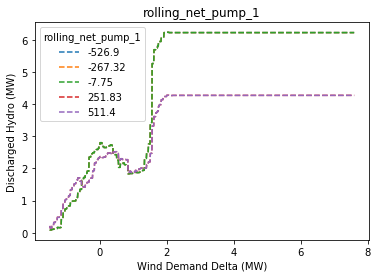

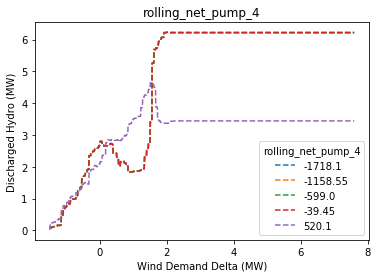

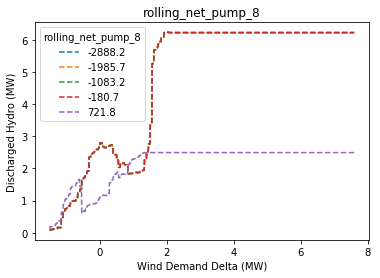

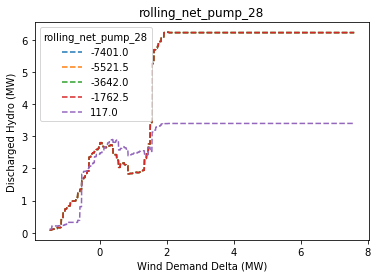

In [26]:
step_feature_idxs = [1, 2, 3, 4]
cont_feature_idx = 0

for step_feature_idx in step_feature_idxs:
    plt.figure()
    step_feature = features[step_feature_idx]
    cont_feature = features[cont_feature_idx]

    fake_step_matrix_dict = generate_fake_matrix(features, step_feature, cont_feature, rf_inv_dict)

    plot_individual = False

    for fake_feature in fake_step_matrix_dict.keys():
        fake_features = fake_step_matrix_dict[fake_feature]
        fake_pred_labels = rf.predict(fake_features)
        cont_series = fake_features.T[cont_feature_idx]

        if plot_individual == True:
            plt.figure()
            plt.plot(cont_series, fake_pred_labels, '--', label=fake_feature)
            plt.ylabel('Net Pumping (MW)')
            plt.xlabel('Wind (MW)')
            plt.legend(title=step_feature)

        else:
            plt.plot(cont_series, fake_pred_labels, '--', label=fake_feature)

    plt.ylabel('Discharged Hydro (MW)')
    plt.xlabel('Wind Demand Delta (MW)')
    plt.legend(title=step_feature)
    plt.title(step_feature)

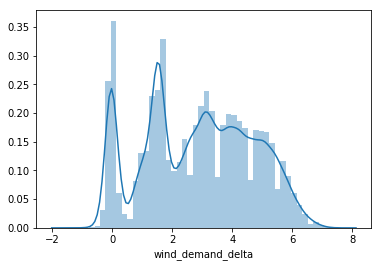

In [27]:
sns.distplot(df_hydro['wind_demand_delta'])

<br>

## Allocation Model

Cycle through with new model which decides when the reservoir is full

System Characteristics:
* 6x 500 kW fixed pumps & 2x 1.5 variable pumps
* 270 MWh reservoir capacity

In [28]:
df_hierro.head()

datetime  demand  diesel  wind  pump_hydro  dsch_hydro  wind_adj
0 2016-01-01 00:00:00     5.1     5.2   0.0         0.0         0.0       0.0
1 2016-01-01 00:10:00     5.1     5.2   0.0         0.0         0.0       0.0
2 2016-01-01 00:20:00     5.3     5.4   0.0         0.0         0.0       0.0
3 2016-01-01 00:30:00     5.3     5.4   0.0         0.0         0.0       0.0
4 2016-01-01 00:40:00     5.3     5.4   0.0         0.0         0.0       0.0

In [29]:
def determine_stored(df, pump_col='pump_hydro', dsch_col='dsch_hydro', stored=0, capacity=270):
    df['stored'] = 0

    for i in range(df.shape[0]):
        if stored < capacity:
            stored -= df.loc[i, pump_col]/4

        if stored > 0:
            stored -= df.loc[i, dsch_col]

        df.at[i, 'stored'] = stored
        
    return df
    
df_hierro = determine_stored(df_hierro)
df_hierro.head()

datetime  demand  diesel  wind  pump_hydro  dsch_hydro  wind_adj  \
0 2016-01-01 00:00:00     5.1     5.2   0.0         0.0         0.0       0.0   
1 2016-01-01 00:10:00     5.1     5.2   0.0         0.0         0.0       0.0   
2 2016-01-01 00:20:00     5.3     5.4   0.0         0.0         0.0       0.0   
3 2016-01-01 00:30:00     5.3     5.4   0.0         0.0         0.0       0.0   
4 2016-01-01 00:40:00     5.3     5.4   0.0         0.0         0.0       0.0   

   stored  
0       0  
1       0  
2       0  
3       0  
4       0

In [30]:
#plt.scatter(df_hydro.wind_demand_delta, df_hydro.dsch_hydro, 
#            alpha=0.0075, c=df_hydro[f'rolling_net_pump_{rolling_window}'], cmap='viridis')

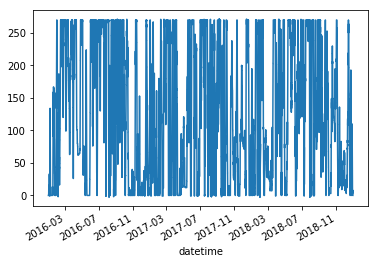

In [31]:
#df_hydro['stored'] = df_hierro.set_index('datetime')['stored'].copy()
df_hierro.set_index('datetime')['stored'].copy().plot()

## Net Pumping Model

Model net pumping not one or the other

* Add heatmap for random forest inspection

In [32]:
keep_list = ['pump_hydro', 'dsch_hydro', 'demand_delta', 'wind_demand_delta']
drop_list = list( set(df_hydro.columns) - set(keep_list) )

df_hydro = (df_hydro
            .assign(net_pump = df_hydro.pump_hydro + df_hydro.dsch_hydro)
            .drop(columns=drop_list)
           )

df_hydro.head()

pump_hydro  dsch_hydro  demand_delta  wind_demand_delta  \
datetime                                                                       
2016-01-19 15:50:00        -0.6         0.0          -0.1                2.7   
2016-01-19 16:00:00        -0.5         0.0          -0.1                2.7   
2016-01-19 16:10:00        -0.7         0.0          -0.1                2.4   
2016-01-19 16:20:00         0.0         0.5           0.4                3.2   
2016-01-19 16:30:00         0.0         0.2           0.1                2.8   

                     net_pump  
datetime                       
2016-01-19 15:50:00      -0.6  
2016-01-19 16:00:00      -0.5  
2016-01-19 16:10:00      -0.7  
2016-01-19 16:20:00       0.5  
2016-01-19 16:30:00       0.2

In [33]:
## Setting feature and target variables
target = 'net_pump'
features = ['wind_demand_delta']

## Statsmodel Regression
y = df_hydro[target]
X = df_hydro[features]

baseline_error = determine_baseline_err(test_labels)


Average baseline error:  0.4153



Training Features Shape: (159606, 1)
Training Labels Shape: (159606,)
Testing Features Shape: (8401, 1)
Testing Labels Shape: (8401,)

Mean Absolute Error: 1.1448
Mean Squared Error: 2.2877
Root Mean Squared Error: 1.5125
Mean Absolute Percentage Error: 85548
R2 Score: 0.4356

Error reduction on baseline: 32.7%


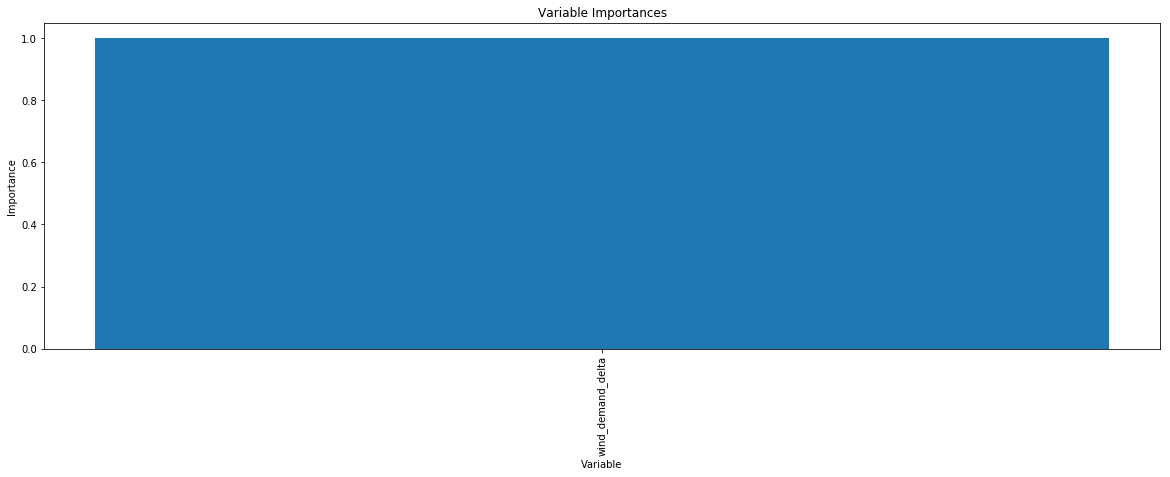

In [34]:
train_features, test_features, train_labels, test_labels = format_data_4_ML(df_hydro, target, features)
rf, df_importances = combined_RF_model(train_features, train_labels, test_features, test_labels, features, n_trees=100, )

Text(0,0.5,'Predicted Hydro Discharge')

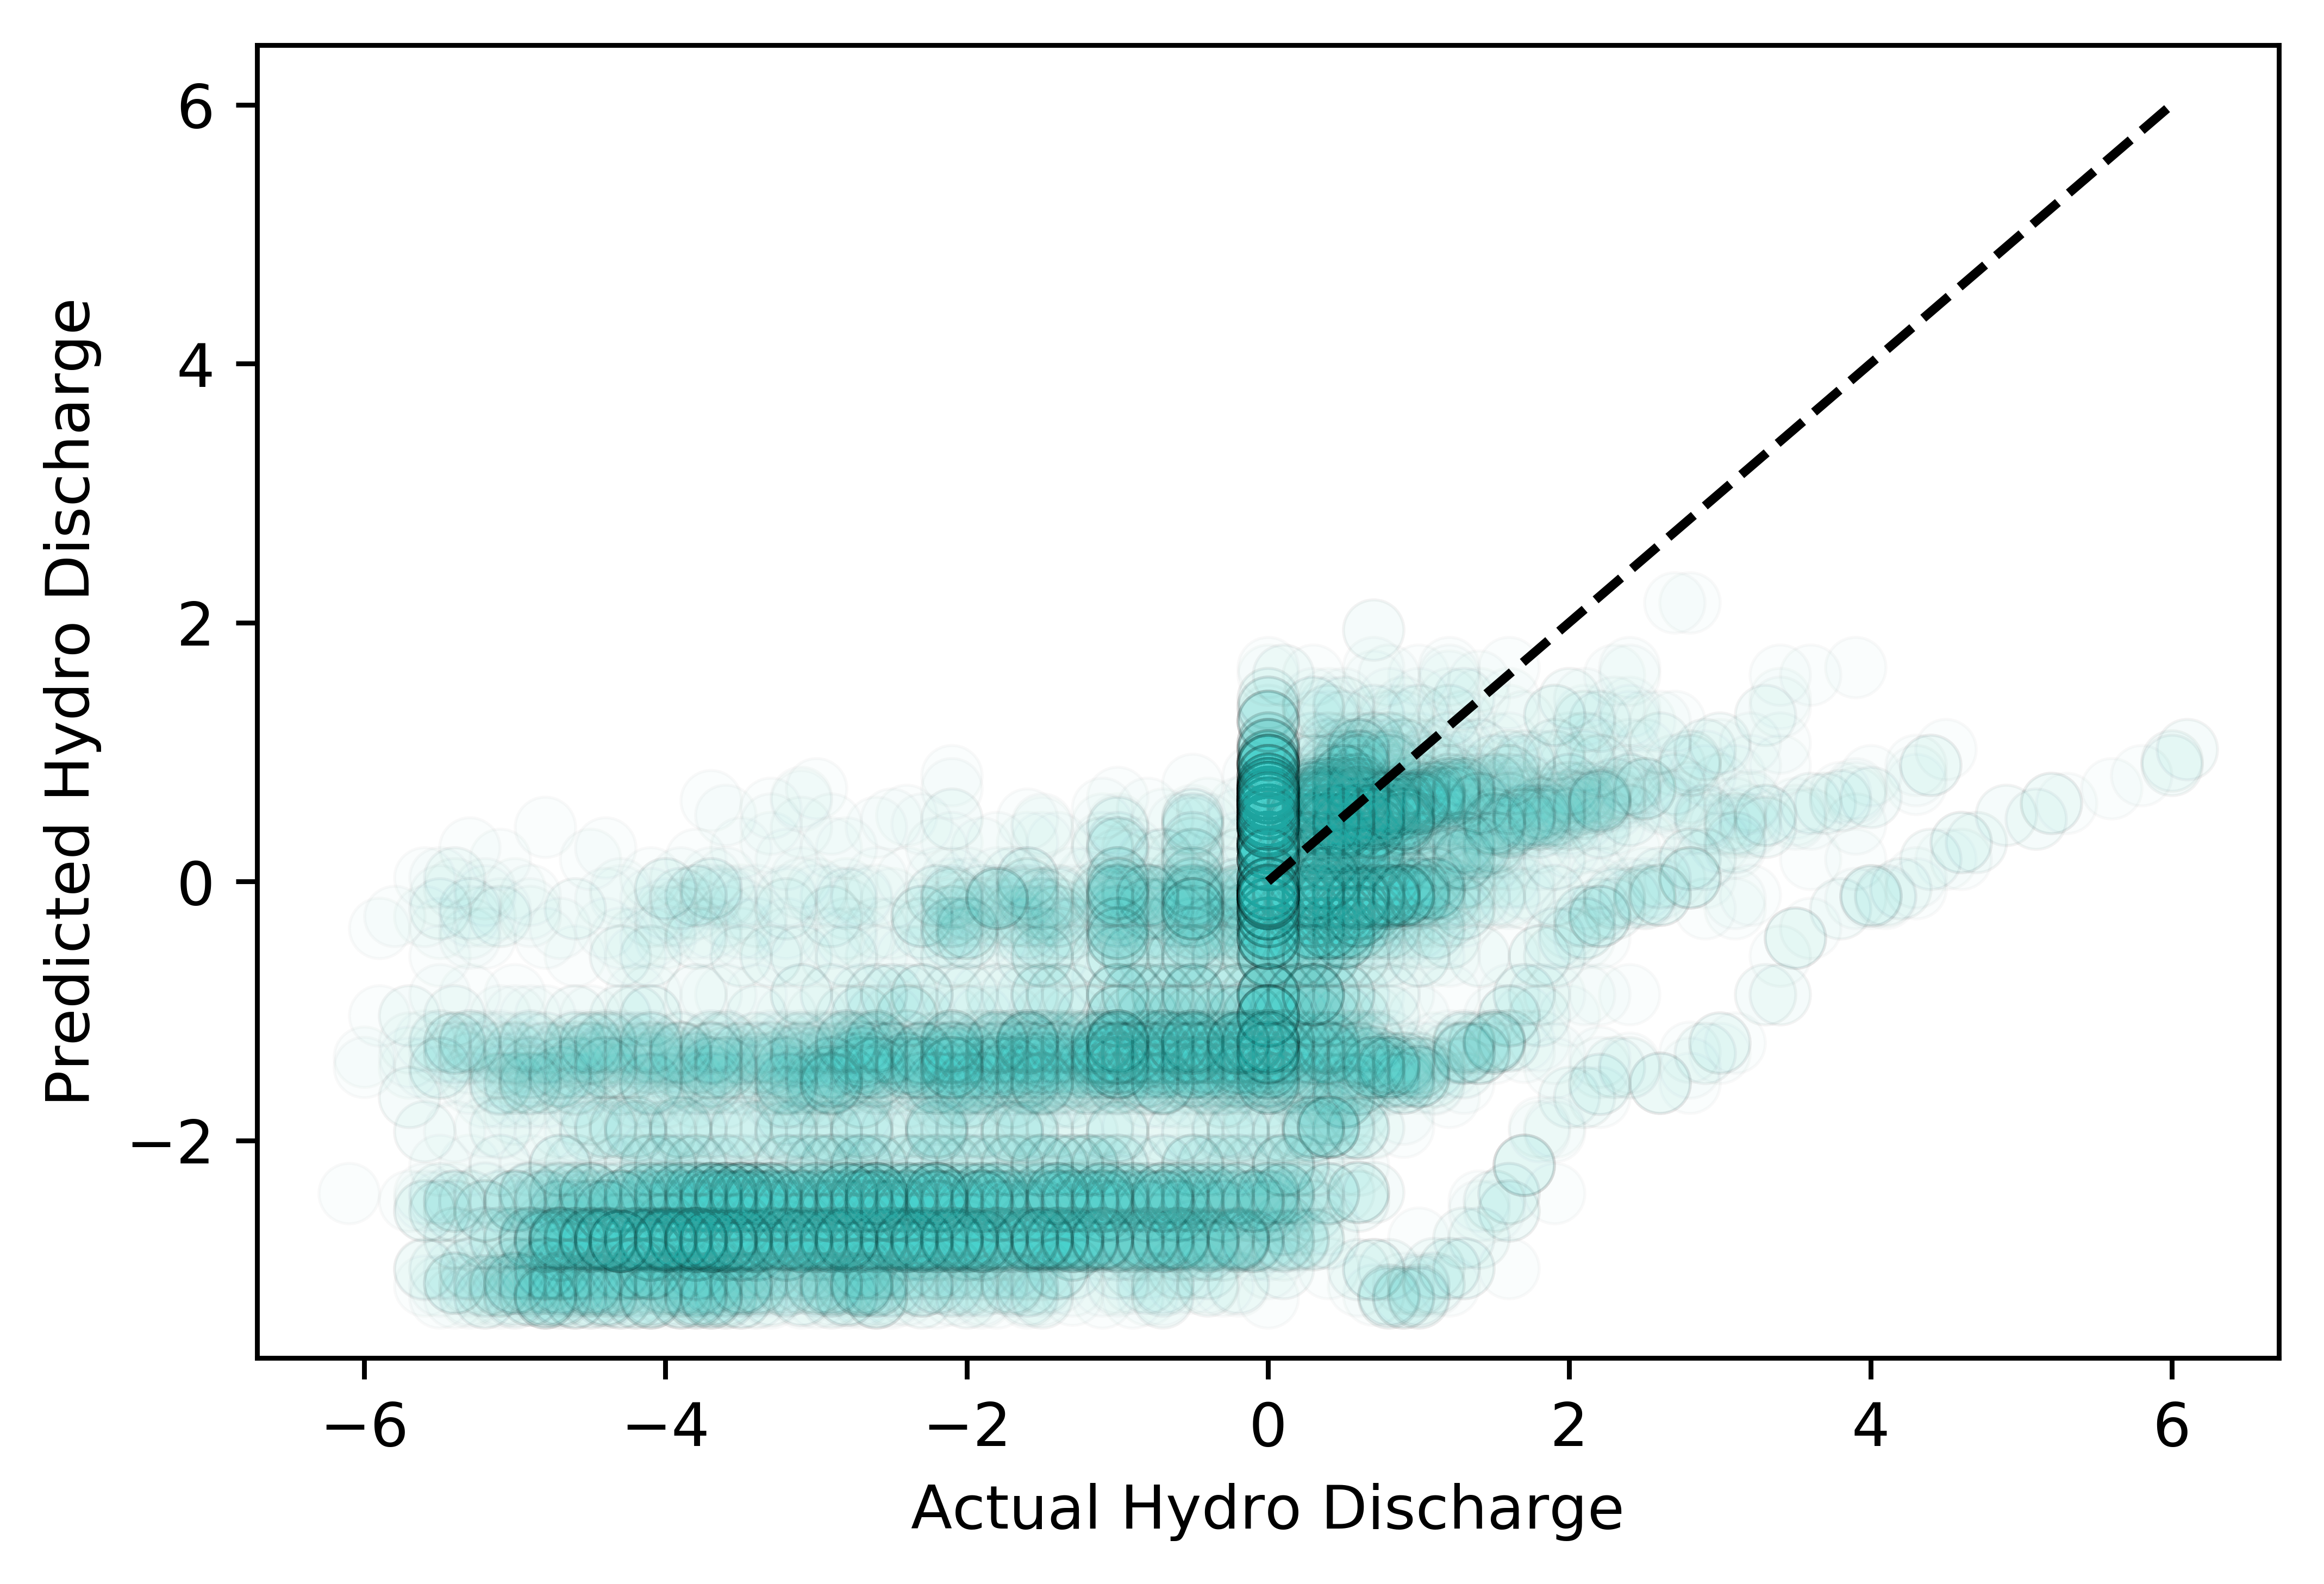

In [35]:
pred_labels = rf.predict(test_features)

plt.figure(dpi=800)

plt.scatter(test_labels, pred_labels, color='mediumturquoise', edgecolors='k', linewidths=0.5, alpha=0.025, s=100)
plt.plot([0, 6], [0, 6], 'k--')

#plt.xlim(0, 4)
#plt.ylim(0, 4)
plt.xlabel('Actual Hydro Discharge')
plt.ylabel('Predicted Hydro Discharge')